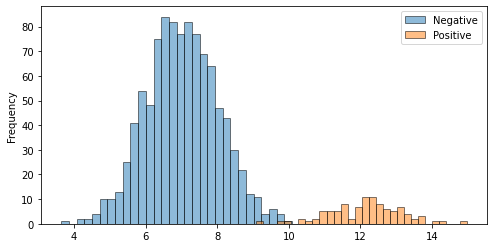

In [3]:
import numpy as np
import numpy.random as rn
import pandas as pd
import matplotlib.pyplot as plt

pos_center = 12
pos_count = 100
neg_center = 7
neg_count = 1000

rs = rn.RandomState(rn.MT19937(rn.SeedSequence(42)))
gini = pd.DataFrame({'value': np.append((pos_center) + rs.randn(pos_count),
                                        (neg_center) + rs.randn(neg_count)),
                    'label':
                    ['pos']*pos_count + ['neg']*neg_count})


fig, ax = plt.subplots(figsize = (8, 4))
_ = (gini.groupby('label')[['value']].plot.hist(bins=30, alpha=.5, ax=ax, edgecolor='black'))

ax.legend(['Negative', 'Positive'])

In [4]:
def calc_gini(df, val_col, label_col, pos_val, split_point, debug=False):
    """
    This function calculates the gini impurity of a datset. Gini impurity\
    is a measure of the probability of a random sample being classified incorrectly\
    when a feature is used to split the data. The lower the impurity, the better the split

    Parameter:
    df(pd.DataFrame): The dataframe containing the data
    val_col(str): The column name of the feature used to split the data
    label_col(Str): The column name of the target variable
    pos_val(str or int): The value of the target variable that represents the positive class
    split_point(float); The threshold used to split the data
    debug(bool): optional, when set to True, prints teh calculated Gini impuritird and the final weighted average

    Returns:
    float: The weighted average of Gini impurity for the positive and negative subsets
    """

    ge_split = df[val_col] >= split_point
    eq_pos = df[label_col] == pos_val
    tp = df[ge_split & eq_pos].shape[0]
    fp = df[ge_split & ~eq_pos].shape[0]
    tn = df[~ge_split & ~eq_pos].shape[0]
    fn = df[~ge_split & eq_pos].shape[0]
    pos_size = tp+fp
    neg_size = tn+fn
    total_size  = len(df)
    if pos_size == 0:
        gini_pos = 0
    else:
        gini_pos = 1 - (tp/pos_size)**2 - (fp/pos_size)**2
    if neg_size == 0:
        gini_neg = 0
    else:
        gini_neg = 1 - (tn/neg_size)**2 - (fn/neg_size)**2
    weighted_avg = gini_pos * (pos_size/total_size) + gini_neg * (neg_size/total_size)

    if debug:
        print(f'{gini_pos:.3} {gini_neg:.3} {weighted_avg:.3}')
    
    return weighted_avg

In [5]:
calc_gini(gini, val_col="value", label_col="label", pos_val="pos", split_point=9.24, debug=True)

0.217 0.00202 0.0241


0.024117224644432264

Text(0.5, 0, 'Split Point')

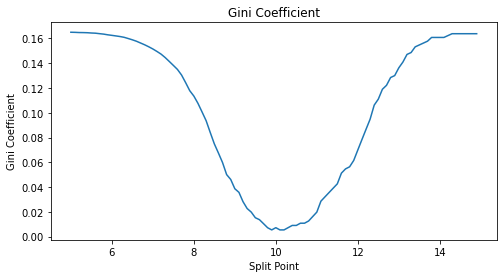

In [7]:
values = np.arange(5, 15, .1)
ginis = []
for v in values:
    ginis.append(calc_gini(gini, val_col="value", label_col="label", pos_val="pos", split_point=v))

fig, ax = plt.subplots(figsize=(8, 4))
ax.plot(values, ginis)
ax.set_title("Gini Coefficient")
ax.set_ylabel("Gini Coefficient")
ax.set_xlabel("Split Point")

In [8]:
pd.Series(ginis, index=values).loc[9.5:10.5]

9.6     0.013703
9.7     0.010470
9.8     0.007193
9.9     0.005429
10.0    0.007238
10.1    0.005438
10.2    0.005438
10.3    0.007244
10.4    0.009046
10.5    0.009046
dtype: float64

In [9]:
print(pd.DataFrame({"gini":ginis, "split":values})
      .query("gini <= gini.min()"))

        gini  split
49  0.005429    9.9


In [10]:
from sklearn import tree
stump = tree.DecisionTreeClassifier(max_depth=1)
stump.fit(gini[["value"]], gini.label)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'value <= 9.708\ngini = 0.165\nsamples = 1100\nvalue = [1000, 100]\nclass = neg'),
 Text(0.25, 0.25, 'gini = 0.002\nsamples = 999\nvalue = [998, 1]\nclass = neg'),
 Text(0.75, 0.25, 'gini = 0.039\nsamples = 101\nvalue = [2, 99]\nclass = pos')]

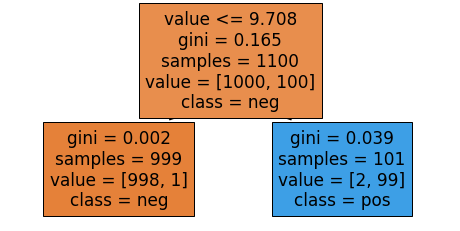

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
tree.plot_tree(stump, feature_names=["value"],
               filled=True,
               class_names=stump.classes_.tolist(),
               ax=ax)